In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from hw2 import hw2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
hw2.problem_2_part_a()

,Predicted 0,Predicted 1
True 0,54,2
True 1,5,32


Accuracy: 92.47


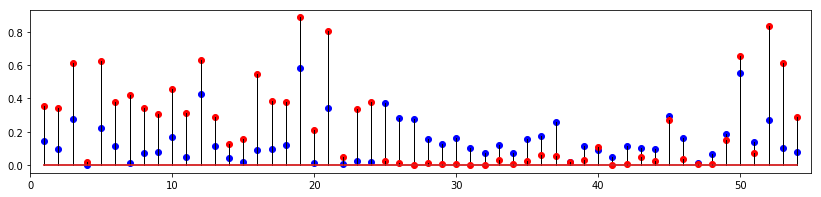

In [167]:
hw2.problem_2_part_b()

Calculating neighbours


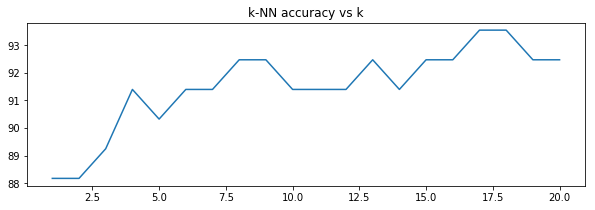

In [ ]:
hw2.plot_accuracy(*hw2.problem_2_part_c())

In [20]:
import numpy as np
X_train, y_train, X_test, y_test = hw2.load_data(data_dir='./hw2/hw2-data')

In [39]:
# print(y_test)
class_0_indices, _ = np.where(y_test==0)
class_1_indices, _ = np.where(y_test==1)
print(class_0_indices, class_1_indices)

[37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86
 87 88 89 90 91 92] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]


In [50]:
print(X_train.shape, y_train.shape, (y_train == 1).shape)
X_train[(y_train == 1).flatten(),:]

(4508, 57) (4508, 1) (4508, 1)


array([[   1,    1,    1, ...,    5,  101, 1028],
       [   1,    0,    1, ...,   10,  485, 2259],
       [   0,    0,    0, ...,    4,   40,  191],
       ..., 
       [   0,    0,    1, ...,    4,   62,  258],
       [   0,    0,    0, ...,    4,   66,  101],
       [   0,    1,    1, ...,    3,  318, 1003]])

In [57]:
np.sum(X_train[(y_train == 1).flatten(),:], axis=0)

array([   628,    607,   1089,     38,   1107,    668,    745,    611,
          547,    814,    557,   1118,    510,    227,    285,    968,
          681,    677,   1574,    373,   1432,     94,    594,    669,
           49,     26,      7,     30,     12,     17,      3,      2,
           61,     10,     45,    111,     99,     32,     59,    199,
            1,     20,     85,     46,    479,     68,     18,     16,
          269,   1160,    128,   1480,   1092,    509,  16924, 185553,
       837566])

In [98]:
x = np.arange(12).reshape((6,-1))
print(x)
np.sum(x, axis=1)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]


array([ 1,  5,  9, 13, 17, 21])

In [122]:
np.meshgrid(np.array([1,2,3]), np.array(['a', 'b', 'c', 'd']))

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([['a', 'a', 'a'],
        ['b', 'b', 'b'],
        ['c', 'c', 'c'],
        ['d', 'd', 'd']],
       dtype='<U1')]

In [147]:
def log_and_return(x1, x2, r):
    print("({}, {}) -> {}".format(x1, x2, r))
    return r

def abc(X, Y):
    distance = np.vectorize(lambda x1, x2: log_and_return(x1, x2, np.sum(np.abs(x1-x2))), signature='(i),(i)->()')
    xx, yy = np.meshgrid(np.arange(X.shape[0]), np.arange(Y.shape[0]))
    print('xx', xx.shape, xx)
    print('yy', yy.shape, yy)
    print(X[xx])
    print(Y[yy])
    return distance(X[xx], Y[yy])
    
a = np.array([
    [1, 1],
    [2, 2],
    [3, 5]
])
b = np.array([
    [1.1, 1.1],
    [2.2, 2.2]
])
print(abc(a,b))

xx (2, 3) [[0 1 2]
 [0 1 2]]
yy (2, 3) [[0 0 0]
 [1 1 1]]
[[[1 1]
  [2 2]
  [3 5]]

 [[1 1]
  [2 2]
  [3 5]]]
[[[ 1.1  1.1]
  [ 1.1  1.1]
  [ 1.1  1.1]]

 [[ 2.2  2.2]
  [ 2.2  2.2]
  [ 2.2  2.2]]]
([1 1], [ 1.1  1.1]) -> 0.20000000000000018
([2 2], [ 1.1  1.1]) -> 1.7999999999999998
([3 5], [ 1.1  1.1]) -> 5.8
([1 1], [ 2.2  2.2]) -> 2.4000000000000004
([2 2], [ 2.2  2.2]) -> 0.40000000000000036
([3 5], [ 2.2  2.2]) -> 3.5999999999999996
[[ 0.2  1.8  5.8]
 [ 2.4  0.4  3.6]]


In [131]:
def num(points):
    print(points)
    expd=np.expand_dims(points,2) #need another dimension...
    print(expd)
    tiled=np.tile(expd, points.shape[0]) #...to tile up the vectors
    print(tiled)
    trans=np.transpose(points) #Also need to transpose the points matrix to fit well with broadcasting
    print(trans)
    diff=trans-tiled           #doing the difference, exploiting Numpy broadcasting capabilities
    #num=np.sum(np.square(diff), axis=1) #an then obtain the squared norm of the difference
    return diff

num(np.arange(9).reshape((3,3)))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[[0]
  [1]
  [2]]

 [[3]
  [4]
  [5]]

 [[6]
  [7]
  [8]]]
[[[0 0 0]
  [1 1 1]
  [2 2 2]]

 [[3 3 3]
  [4 4 4]
  [5 5 5]]

 [[6 6 6]
  [7 7 7]
  [8 8 8]]]
[[0 3 6]
 [1 4 7]
 [2 5 8]]


array([[[ 0,  3,  6],
        [ 0,  3,  6],
        [ 0,  3,  6]],

       [[-3,  0,  3],
        [-3,  0,  3],
        [-3,  0,  3]],

       [[-6, -3,  0],
        [-6, -3,  0],
        [-6, -3,  0]]])

In [165]:
np.linspace(start=1, stop=20, num=20, dtype=np.int)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])